In [2]:
import os

import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz


In [3]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [4]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [5]:
# Transform COLLEGE column to a numeric variable
#df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
#df = df.drop("COLLEGE", axis="columns")
#df = df.drop("COLLEGE", axis="columns")
#df.head(5)

In [6]:
#df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('category')
#df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('category')
#df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('category')
#df.COLLEGE2 = df.COLLEGE2.astype('category')
###
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [7]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
#df = df.drop("LEAVE", axis="columns")
df.head(5)
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
COLLEGE2                        int32
LEAVE2                          int32
dtype: object

In [8]:
# Using variables INCOME, HOUSE, and COLLEGE2 as we did in our lab notebook
#predictor_cols = ["INCOME", "HOUSE","COLLEGE2"]
#predictor_cols = ["INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","COLLEGE2"]
predictor_cols = ["INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]
#predictor_cols = ["INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION"]


target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 8)
X_test shape: (5000, 8)
y_train shape: (15000,)
y_test shape: (5000,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression(C = 100, max_iter = 2000)
lin_model.fit(X_train, y_train)
scores = cross_val_score(lin_model, X_train, y_train, cv = 10)

print("Cross validation scores: {}".format(scores))
print("Average cross validation score: \t\t{:.2f}".format(scores.mean()))
print("Std. dev of cross validation score: \t\t{:.2f}".format(scores.std()))
print("Minimum of cross validation score: \t\t{:.2f}".format(scores.min()))
y_pred = lin_model.predict(X_test)
print("Test set score: \t\t\t\t{:.2f}".format(np.mean(y_pred == y_test)))

Cross validation scores: [0.602      0.62133333 0.61066667 0.61466667 0.646      0.64
 0.644      0.63333333 0.63066667 0.658     ]
Average cross validation score: 		0.63
Std. dev of cross validation score: 		0.02
Minimum of cross validation score: 		0.60
Test set score: 				0.64


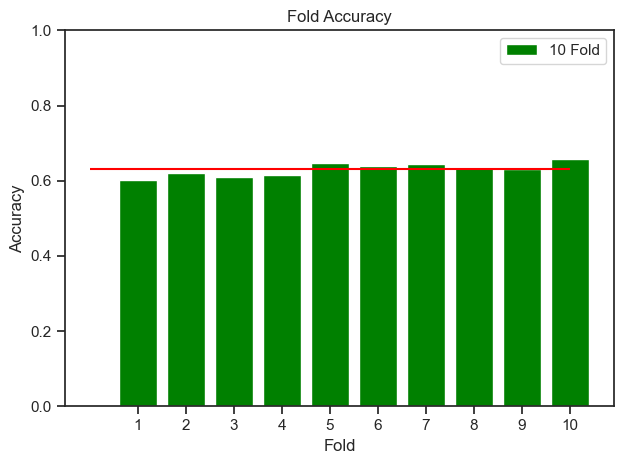

In [11]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 11, 1)

 
plt.bar(parameter_range, scores,
         label="10 Fold", color='g')

plt.plot(scores.mean())
plt.hlines(scores.mean(),xmin=0,xmax=10,colors="red")

# Creating the plot
plt.title("Fold Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.legend(loc='best')
plt.xticks(ticks=parameter_range)
plt.show()

In [12]:
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(X_train.columns))
count = 0
for col in X_train.columns:
    if(col == "LEAVE2"):
        break
    print(col,"  ", lin_model.coef_[0,count],"\n")
    count = count + 1
    
print("FINALLY printing the Intercept for Logistic Regression = ", lin_model.intercept_)

Number of columns in data frame =  8
INCOME    -2.9816358527257323e-06 

OVERAGE    -0.005850926159370588 

LEFTOVER    -0.0007842407284675782 

HOUSE    1.8948721746861057e-06 

HANDSET_PRICE    -0.00039923025990176215 

OVER_15MINS_CALLS_PER_MONTH    -0.0005403368479157658 

AVERAGE_CALL_DURATION    -1.6438783560561454e-05 

COLLEGE2    -5.21409552635026e-06 

FINALLY printing the Intercept for Logistic Regression =  [-5.83312163e-06]


In [13]:
# Finally print the ODDS ratios for each of the independent variables
# The ODDS ratio os the increase in likelihood for a ONE unit increase in the independent variable
# The odds ratio is simply the exponent of the fitted coefficient
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(X_train.columns))
count = 0
for col in X_train.columns:
    # Do nothing if you have reached the last column since it contains the diagnosis (the Y variable)
    print(col)
    if(col == "LEAVE2"):
        count = count + 1
        break
    print("ODDS Ratio for variable ", col,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    count = count + 1
    

Number of columns in data frame =  8
INCOME
ODDS Ratio for variable  INCOME =   0.9999970183685923 

OVERAGE
ODDS Ratio for variable  OVERAGE =   0.9941661571750758 

LEFTOVER
ODDS Ratio for variable  LEFTOVER =   0.9992160667079192 

HOUSE
ODDS Ratio for variable  HOUSE =   1.00000189487397 

HANDSET_PRICE
ODDS Ratio for variable  HANDSET_PRICE =   0.9996008494218943 

OVER_15MINS_CALLS_PER_MONTH
ODDS Ratio for variable  OVER_15MINS_CALLS_PER_MONTH =   0.9994598091077492 

AVERAGE_CALL_DURATION
ODDS Ratio for variable  AVERAGE_CALL_DURATION =   0.9999835613515555 

COLLEGE2
ODDS Ratio for variable  COLLEGE2 =   0.999994785918067 



In [14]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.634461
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 LEAVE2   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14992
Method:                           MLE   Df Model:                            7
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                 0.08460
Time:                        13:08:03   Log-Likelihood:                -9516.9
converged:                       True   LL-Null:                       -10397.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
INCOME                      -2.366e-06   5.89e-07     -4.015      0.000   

Confusion matrix, without normalization
[[1517  907]
 [ 871 1705]]
Normalized confusion matrix
[[0.63 0.37]
 [0.34 0.66]]


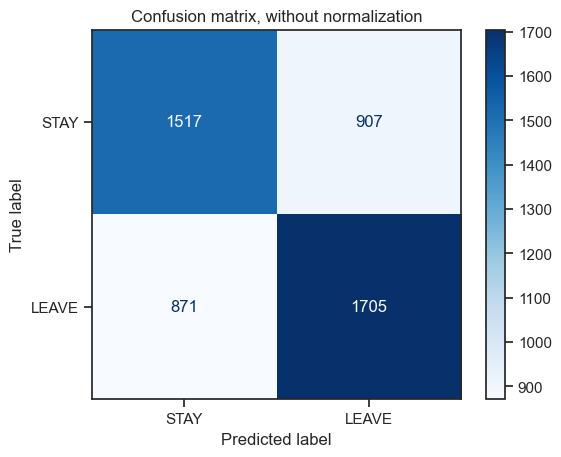

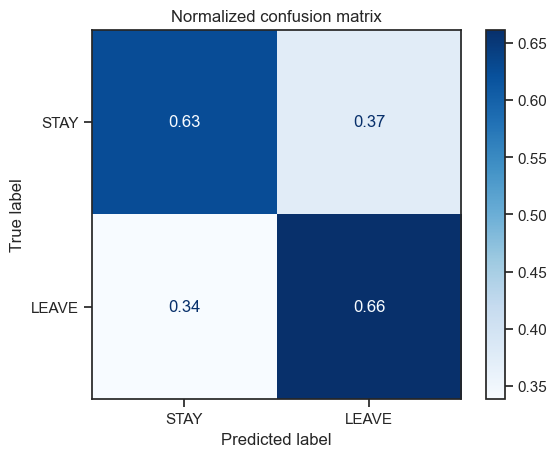

              precision    recall  f1-score   support

        STAY       0.64      0.63      0.63      2424
       LEAVE       0.65      0.66      0.66      2576

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
import numpy as np

classifier = lin_model

#decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
## Let's tell the model what is the data
#decision_tree.fit(X_train, y_train)



np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=["STAY","LEAVE"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

scores = cross_val_score(classifier, X_train, y_train, cv = 10)

print(classification_report(y_test, y_pred, target_names=["STAY","LEAVE"]))